In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import UnivariateSpline
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
sys.path.append("../")

### Import Desired Tires

In [4]:
all_tires = {
    "cornering_Hoosier_16x6.0-10_LCO_6":{"long":None, "lat":None},
    "cornering_Hoosier_16x6.0-10_LCO_7":{"long":None, "lat":None},
    "cornering_Hoosier_16x6.0-10_R20_6":{"long":None, "lat":None},
    "cornering_Hoosier_16x6.0-10_R20_7":{"long":None, "lat":None},
    "cornering_Hoosier_16x7.5-10_LCO_7":{"long":None, "lat":None},
    "cornering_Hoosier_16x7.5-10_LCO_8":{"long":None, "lat":None},
    "cornering_Hoosier_16x7.5-10_R20_7":{"long":None, "lat":None},
    "cornering_Hoosier_16x7.5-10_R20_8":{"long":None, "lat":None},
}

### Filter Data

In [5]:
camber = 0 # default camber
pressure = 12 * 6.89476 # default pressure
velocity = 25 * 1.60934 # default velocity
slip_angle = 0
tire_scaling = 2/3

tire_dict = all_tires.items()

for name, tire in tire_dict:
    try:
        df = pd.read_csv(f"../processing/results/{name}.csv")
        tire["long"] = df[(df["pressure"] == pressure) & (df["velocity"] == velocity) & (df["camber"] == camber) & (df["slip"] == slip_angle)]
    except:
        print("Error getting long data for {0}".format(name))

    try:
        df = pd.read_csv(f"../processing/results/{name}.csv")
        tire["lat"] = df[((df["velocity"] == velocity) & (df["pressure"] == pressure) & (df["camber"] == camber))]
    except:
        print("Error getting lateral data for {0}".format(name))

### Calculate Lateral Friction Coefficient

In [6]:
peak_mu_lst = []
normal_load_lst = []
tire_name = []

normal_loads = sorted(np.array(tire["lat"]["load"].unique()))

for name, tire in all_tires.items():
    current_peak_mu = []
    current_normal_load = []
    for load in normal_loads:
        temp = tire["lat"][tire["lat"]["load"] == load]
        peak_mu = max(temp["FY"]) * 2/3 / abs(load)

        current_peak_mu.append(peak_mu)
        current_normal_load.append(load)

    normal_load_lst.append(current_normal_load)
    peak_mu_lst.append(current_peak_mu)
    tire_name.append(name[10:])

### Check mu visually to filter out points

Text(0, 0.5, 'Lateral Friction Coefficient')

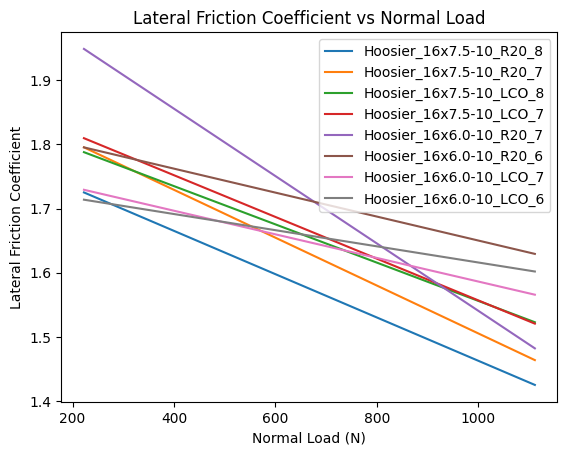

In [8]:
tire_names = tire_name[::-1]

for i in range(len(peak_mu_lst)):
    reversed_mu = peak_mu_lst[i][::-1]
    adjusted_FZ = sorted(-1 * np.array(normal_load_lst[i]))
    plot = UnivariateSpline(adjusted_FZ, reversed_mu, k = 1)
    x_vals = np.linspace(min(adjusted_FZ), max(adjusted_FZ), 100)
    y_vals = plot(x_vals)
    plt.plot(x_vals, y_vals)

    # plt.scatter(adjusted_FZ, reversed_mu)

plt.legend(tire_names)
plt.title("Lateral Friction Coefficient vs Normal Load")
plt.xlabel("Normal Load (N)")
plt.ylabel("Lateral Friction Coefficient")

### Manual Mu Filtering for 16" Tires

In [9]:
name_1 = "cornering_Hoosier_16x6.0-10_LCO_6"
FZ_1 = [-1112.0551223483046, -889.6440978786436, -667.2330734089827, -444.8220489393218]
Mu_1 = [1.4527757070666665, 1.5016641709333334, 1.5421197994222224, 1.6005951182000002]

name_2 = "cornering_Hoosier_16x6.0-10_LCO_7"
FZ_2 = [-1112.0551223483046, -889.6440978786436, -667.2330734089827, -444.8220489393218, -222.4110244696609]
Mu_2 = [1.4821447548266666, 1.5468957417333336, 1.6050863024444446, 1.6872065322666667, 1.8264082650666669]

name_3 = "cornering_Hoosier_16x6.0-10_R20_6"
FZ_3 = [-1112.0551223483046, -889.6440978786436, -667.2330734089827, -444.8220489393218, -222.4110244696609]
Mu_3 = [1.5529505974666664, 1.5779268773666666, 1.6196139596, 1.7057907429333337, 1.8202634857333333]

name_4 = "cornering_Hoosier_16x6.0-10_R20_7"
FZ_4 = [-1112.0551223483046, -889.6440978786436, -667.2330734089827, -444.8220489393218, -222.4110244696609]
Mu_4 = [1.5360989148266666, 1.5919774398666666, 1.6438633570666665, 1.7203433788666664, 1.8331525350666669]

name_5 = "cornering_Hoosier_16x7.5-10_LCO_7"
FZ_5 = [-1112.0551223483046, -889.6440978786436, -667.2330734089827, -444.8220489393218]
Mu_5 = [1.5372139674666665, 1.6006026118333332, 1.6639762689333335, 1.708788196266667]

name_6 = "cornering_Hoosier_16x7.5-10_LCO_8"
FZ_6 = [-1112.0551223483046, -889.6440978786436, -667.2330734089827, -444.8220489393218, -222.4110244696609]
Mu_6 = [1.6239722567466666, 1.6773224299, 1.7266430266222221, 1.7266380308666667, 1.8067749457333333]

name_7 = "cornering_Hoosier_16x7.5-10_R20_7"
FZ_7 = [-1112.0551223483046, -889.6440978786436, -667.2330734089827, -444.8220489393218, -222.4110244696609]
Mu_7 = [1.5741905517866668, 1.6033078134666665, 1.6384979156000001, 1.6820359252666666, 1.7391823730666667]

name_8 = "cornering_Hoosier_16x7.5-10_R20_8"
FZ_8 = [-1112.0551223483046, -889.6440978786436, -667.2330734089827, -444.8220489393218, -222.4110244696609]
Mu_8 = [1.5980982395733334, 1.6274897682333334, 1.6620578988, 1.6992562946666667, 1.7020739008]

tire_names = [name_1, name_2, name_3, name_4, name_5, name_6, name_7, name_8]
FZ_lst = [FZ_1, FZ_2, FZ_3, FZ_4, FZ_5, FZ_6, FZ_7, FZ_8]
Mu_lst = [Mu_1, Mu_2, Mu_3, Mu_4, Mu_5, Mu_6, Mu_7, Mu_8]

### Calculate Slope Magnitudes of Mu vs FZ

In [12]:
modified_FZ_lst = [[-1 * x for x in y[::-1]] for y in FZ_lst]
modified_mu_lst = [x[::-1] for x in Mu_lst]

slope_magnitudes = []

for i in range(len(tire_names)):
    # plt.scatter(modified_FZ_lst[i], modified_mu_lst[i])
    plot = UnivariateSpline(modified_FZ_lst[i], modified_mu_lst[i], k = 1)
    x_vals = np.linspace(min(modified_FZ_lst[1]), max(modified_FZ_lst[1]), 100)
    y_vals = plot(x_vals)
    slope_magnitudes.append(abs((plot(600) - plot(400)) / (600 - 400)))
    # plt.plot(x_vals, y_vals)

# plt.legend(tire_names)
# plt.title("Lateral Friction Coefficient vs Normal Load")
# plt.xlabel("Normal Load (N)")
# plt.ylabel("Lateral Friction Coefficient")

### Save Tire Names and Mu vs FZ Slope Magnitudes to .csv

In [13]:
adjusted_magnitudes = [x * 1000 for x in slope_magnitudes]

output_df = pd.DataFrame()
output_df["Tire"] = tire_names
output_df["abs(slope) * 1000"] = adjusted_magnitudes

output_df.to_csv("16_inch_load_sens.csv")


PermissionError: [Errno 13] Permission denied: '16_inch_load_sens.csv'

### Calculate Cornering Stiffnesses

In [14]:
load_lst = []
cornering_stiffness_lst = []
tire_name = []

for name, tire in all_tires.items():
    current_load = []
    current_cornering_stiffness = []
    for load in normal_loads:
        temp = tire["lat"][tire["lat"]["load"] == load][(tire["lat"]["SA"] < 1) & (tire["lat"]["SA"] > -1)]
        cornering_stiffness = (max(temp["FY"]) - min(temp["FY"])) / 2

        current_load.append(load)
        current_cornering_stiffness.append(cornering_stiffness)

    load_lst.append(current_load)
    cornering_stiffness_lst.append(current_cornering_stiffness)
    tire_name.append(name[10:])


C:\Users\rober\AppData\Local\Temp\ipykernel_19924\3302412262.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp = tire["lat"][tire["lat"]["load"] == load][(tire["lat"]["SA"] < 1) & (tire["lat"]["SA"] > -1)]


### Plot Cornering Stiffness

Text(0, 0.5, 'Cornering Stiffness (N/deg)')

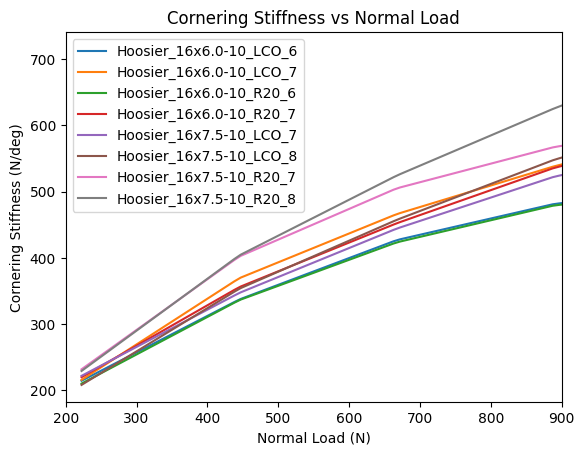

In [15]:
for i in range(len(cornering_stiffness_lst)):
    adjusted_FZ = -1 * np.array(load_lst[i])
    # plt.scatter(adjusted_FZ, cornering_stiffness_lst[i])

    plot = UnivariateSpline(adjusted_FZ[::-1], cornering_stiffness_lst[i][::-1], k = 1)
    x_vals = np.linspace(min(adjusted_FZ), max(adjusted_FZ), 100)
    y_vals = plot(x_vals)
    
    plt.plot(x_vals, y_vals)

plt.xlim(200, 900)
    
plt.legend(tire_name)
plt.title("Cornering Stiffness vs Normal Load")
plt.xlabel("Normal Load (N)")
plt.ylabel("Cornering Stiffness (N/deg)")